In [5]:
import numpy as np

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'IMdB_India.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

         Movie name  Year of release        Watch  hour   Rating Ratedby  \
0         12th Fail             2023  2 hours 27 minutes     8.9    126K   
1          Gol Maal             1979            2 hours      8.5     20K   
2          Maharaja             2024  2 hours 30 minutes     8.6     37K   
3           Nayakan             1987  2 hours 25 minutes     8.7     25K   
4  The World of Apu             1959   1 hour 45 minutes     8.4     17K   

       Film Industry             Genre              Director  \
0  Bollywood (Hindi)  Drama, Biography    Vidhu Vinod Chopra   
1  Bollywood (Hindi)            Comedy  Hrishikesh Mukherjee   
2  Kollywood (Tamil)      Crime, Drama   Nithilan Saminathan   
3  Kollywood (Tamil)      Crime, Drama           Mani Ratnam   
4     Bengali Cinema             Drama          Satyajit Ray   

  Box office collection  User reviews                        Awards  \
0           $138,288.00           945      23 wins & 32 nominations   
1               

In [9]:
# Preprocessing
# Assuming 'Rating' is the target variable, and we drop 'Movie name', 'Description', etc.
X = data.drop(['Rating', 'Movie name', 'Description'], axis=1)
y = data['Rating']

# Handle categorical variables using one-hot encoding if necessary
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
def convert_k_to_numeric(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif '$' in value:
            return float(value.replace('$', '').replace(',', ''))
    return value

# Apply the function to relevant columns again
data['Ratedby'] = data['Ratedby'].apply(convert_k_to_numeric)
data['Box office collection'] = data['Box office collection'].apply(convert_k_to_numeric)
data['User reviews'] = data['User reviews'].apply(convert_k_to_numeric)

# Confirm the changes
print(data[['Ratedby', 'Box office collection', 'User reviews']].head())


    Ratedby Box office collection  User reviews
0  126000.0              138288.0           945
1   20000.0                   NIL            48
2   37000.0              975543.0           370
3   25000.0             120481.93           237
4   17000.0              134241.0            62


In [63]:
# Convert relevant columns to numeric
for col in numeric_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Check the data types to ensure they are numeric
print(X.dtypes)


Year of release            int64
Watch  hour               object
Ratedby                  float64
Film Industry             object
Genre                     object
Director                  object
Box office collection    float64
User reviews               int64
Awards                    object
Streaming platform        object
dtype: object


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add third hidden layer
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1))

# Compile the ANN
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          57,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,649 (233.00 KB)

 Trainable params: 59,649 (233.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 82.3868 - val_loss: 79.2940
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 68.4045 - val_loss: 74.1647
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 59.1941 - val_loss: 69.5776
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 51.2171 - val_loss: 65.3566
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 43.6395 - val_loss: 61.1561
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34.2904 - val_loss: 56.7258
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.8608 - val_loss: 51.9497
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.3197 - val_loss: 47.0301
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.5376 - val_loss: 42.4301
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.7238 - val_loss: 38.8341
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4304 - val_loss: 37.2882
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss

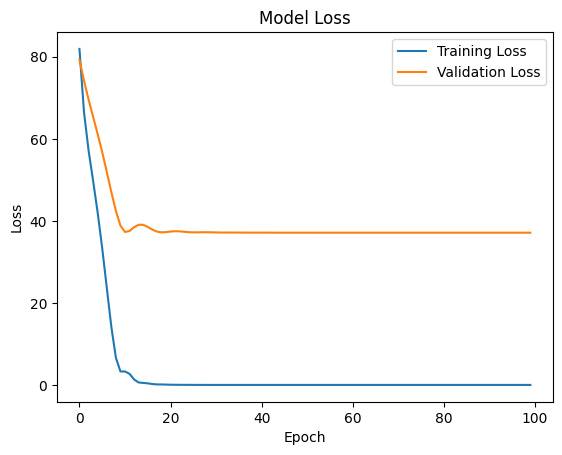

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predicting values using the model
y_pred = model.predict(X_test)

# Compare actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison.head())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5874 
Test Loss: 8.532081604003906
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
     Actual  Predicted
142     8.0   6.438974
6       8.7   4.647791
97      8.1   2.793070
60      8.4   5.377564
112     8.1   5.108802


In [21]:
 def backward(self, X, y, y_hat, learning_rate):
    # Backpropagation
    delta2 = (y_hat - y) * self.sigmoid_derivative(self.z2)
    delta1 = delta2.dot(self.weights2.T) * self.sigmoid_derivative(self.z1)
    self.weights2 -= learning_rate * self.a1.T.dot(delta2)
    self.weights1 -= learning_rate * X.T.dot(delta1)

def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(self, z):
    return self.sigmoid(z) * (1 - self.sigmoid(z))

In [22]:
class NeuralNetwork:
    def _init_(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)


    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.weights1)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2)
        self.y_hat = self.sigmoid(self.z2)
        return self.y_hat

    def backward(self, X, y, y_hat, learning_rate):
        # Backpropagation
        delta2 = (y_hat - y) * self.sigmoid_derivative(self.z2)
        delta1 = delta2.dot(self.weights2.T) * self.sigmoid_derivative(self.z1)
        self.weights2 -= learning_rate * self.a1.T.dot(delta2)
        self.weights1 -= learning_rate * X.T.dot(delta1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))


In [39]:
# Separate features (X) and target variable (y)
X = data.drop('Rating', axis=1)
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (200, 12)
Testing set shape: (50, 12)
Training target shape: (200,)
Testing target shape: (50,)


In [40]:
# Display the column names to verify
print(data.columns)


Index(['Movie name', 'Year of release', 'Watch  hour', 'Rating', 'Ratedby',
       'Film Industry', 'Genre', 'Director', 'Box office collection',
       'User reviews', 'Awards', 'Description', 'Streaming platform'],
      dtype='object')


In [55]:
import pandas as pd

# Inspect unique values in numeric columns to identify non-numeric entries
for col in numeric_features:
    unique_values = X_train[col].unique()
    print(f"Unique values in {col}: {unique_values[:10]}")  # Print first 10 unique values


Unique values in Year of release: [2022. 2017. 2010. 2015. 1999. 2000. 1968. 2019. 2016. 2009.]
Unique values in Ratedby: ['11K' '28K' '5.7K' '8.2K' '8K' '73K' '16K' '7.6K' '7.5K' '59K']
Unique values in Box office collection: [' NIL' '$145,522.00' '$1,566,265.06' '$5,301,204.82' '$158,787.00'
 '$62,744.00' '$9,323,484.00' '$6,024,096.39' '$6,421,597.00'
 '$10,800,778.00']
Unique values in User reviews: [240 151  15  55  10 128  75  28  95 214]
Unique values in Awards: ['4 nominations' '3 wins & 8 nominations' '3 wins & 6 nominations'
 '7 wins & 17 nominations' '5 wins & 1 nomination'
 '8 wins & 6 nominations' 'NIL' '1 win & 2 nominations'
 '3 wins & 18 nominations' '12 wins & 3 nominations']


In [59]:
X_train['Year of release'] = pd.to_numeric(X_train['Year of release'], errors='coerce')
X_test['Year of release'] = pd.to_numeric(X_test['Year of release'], errors='coerce')
def clean_ratedby(column):
    column = column.replace('K', 'e3')  # Replace 'K' with 'e3'
    column = column.replace('M', 'e6')  # Replace 'M' with 'e6'
    return pd.to_numeric(column, errors='coerce')

X_train['Ratedby'] = clean_ratedby(X_train['Ratedby'])
X_test['Ratedby'] = clean_ratedby(X_test['Ratedby'])
def clean_box_office(column):
    column = column.replace('[\$,]', '', regex=True)  # Remove $, , or any other characters
    column = column.replace('K', 'e3')  # Replace 'K' with 'e3'
    column = column.replace('M', 'e6')  # Replace 'M' with 'e6'
    return pd.to_numeric(column, errors='coerce')

X_train['Box office collection'] = clean_box_office(X_train['Box office collection'])
X_test['Box office collection'] = clean_box_office(X_test['Box office collection'])
X_train['User reviews'] = pd.to_numeric(X_train['User reviews'], errors='coerce')
X_test['User reviews'] = pd.to_numeric(X_test['User reviews'], errors='coerce')


In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define numeric and categorical columns
numeric_features = ['Year of release', 'Ratedby', 'Box office collection', 'User reviews']
categorical_features = ['Film Industry', 'Genre', 'Director', 'Streaming platform', 'Awards']

# Define the preprocessor with handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False), categorical_features)
    ])

# Fit the preprocessor on the training data and transform both training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Processed training set shape:", X_train_processed.shape)
print("Processed testing set shape:", X_test_processed.shape)


Processed training set shape: (200, 431)
Processed testing set shape: (50, 431)
